# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>

In this project I will try to find an optimal location for a retail store. Specifically, this report will be targeted to stakeholders interested in opening a **Retail Store** in **Delhi**, India.

Store location should be such that it attracts a lot of traffic all the time. A place where people like to hang out,eat and chill  is ideal for retail stores. Thereby choice of location is very important.We would  prefer locations to set up fashion retail stores at Tehsils in Delhi which has Indian Restaurant, Cafe and Pubs as lots of people come at these places for having fun.

# Data <a name="data"></a>

***Data 1 : Population Data*** 
<Br>City  has a total of 11 Boroughs/District and 27 tehsils/neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 11 boroughs and the neighborhoods that exist in each borough.<Br>
    Details about Population, Literacy Rate and Sex Ratio of people living in each Tehsil of each District of Delhi is collected from the website of [Census India] (https://www.censusindia.co.in/states/delhi).

***Data 2 : Postal Code Data***
<Br>To get the coordinates (Latitude,Longitude) of each tehsil/neighborhood of District/Borough, we will use geocoder class library which takes query as address and postal codes and gives output as coordinates of neighborhood.
To get postal codes of each tehsil, we will use data set available from website: http://www.egreenwatch.nic.in/Masters/Public/TehsilView.aspx?SID=10'

***Data 3 :Foursquare API***
<Br>Delhi City geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in Delhi City.
    FourSquare API is used to get location coordinates of each Tehsil, venues in the neighbourhood of each Tehsil, user ratings of those venues etc. This data will be used to define clusters of Tehsils in which a  retail store can be set up.


# Methodology <a name="methodology"></a>

In the first step data is collected for getting postal code of all tehsils through which we can visualize all neighborhoods in Delhi and further nearby venues can be explored using Foursquare.
In the next step population data is collected and is further explored and analysed based on Literacy Rate, Sex Ratio
In the next step we will use coordinates of each tehsil to explore nearby venues of different category
* [Fetching Data](#fetchingdata)
* [Visualizing Delhi on Map](#visualizemaps)
* [Exploring Population, Literacy Rate and Sex Ratio by Districts of Delhi](#exploringpopulation)
* [Exploring Venues in the Tehsils](#exploringvenues)

In the last step we will focus on analysing top ten venues of each neighborhood and based on unique category we will group all neighborhood based on **k-means clustering** algorithm. We will present map of all clusters of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final ' exploration and search for optimal venue location by stakeholders.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import geocoder
from geopy.geocoders import Nominatim
import folium
from pandas import json_normalize
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import table

print("All Libraries Loaded")

All Libraries Loaded


### 3.1 Fetching Data<a name="fetchingdata"></a>

<p>We will import population data of Delhi as dataframe:</p>

In [19]:
pop_df=pd.read_excel('Population_data.xls',header=0)
pop_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State/District/ Sub District,Total/ Rural/ Urban,Number of Households,Population,NaN,NaN,Growth Rate 2001-2011,Sex ratio,NaN,Child population in the age-group 0-6,...,Household Industry Workers,NaN,NaN,Other Workers,NaN,NaN,Non Workers,NaN,NaN,% to Non Workers to Total Population
3,NaN,NaN,NaN,Persons,Males,Females,NaN,2001,2011,Persons,...,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,NaN
4,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
5,NCT of Delhi,Total,3435999,16787941,8987326,7800615,21.2081,820.702,867.957,2012454,...,181852,152758,29094,5332324,4550458,781866,11200892,4225300,6975592,66.7199
6,NaN,Rural,79574,419042,226321,192721,-55.6441,809.52,851.538,56716,...,3284,2358,926,104801,91389,13412,288815,114821,173994,68.9227
7,NaN,Urban,3356425,16368899,8761005,7607894,26.8339,821.526,868.381,1955738,...,178568,150400,28168,5227523,4459069,768454,10912077,4110479,6801598,66.6635
8,North West District,Total,736253,3656539,1960922,1695617,27.8122,820.251,864.704,449894,...,35896,30655,5241,1127927,971619,156308,2467994,938503,1529491,67.4954
9,NaN,Rural,40500,213950,115680,98270,-19.3746,808.377,849.499,28936,...,1504,1176,328,54657,47163,7494,146458,58464,87994,68.4543


In [20]:
#filtereing out all the unnecessary information
rows=[11,14,17,23,26,29,35,38,41,47,50,53,59,62,65,71,74,77,83,86,89,95,98,101,107,110,113]
pop_filter=pop_df.iloc[rows,[0,3]].reset_index(drop=True)
pop_filter.columns=['Neighborhood','Population']
pop_filter

,Neighborhood,Population
0,Narela,809913
1,Saraswati Vihar,2250816
2,Model Town,595810
3,Civil Lines,688616
4,Sadar Bazar,130188
5,Kotwali,69174
6,Seelam Pur,1378779
7,Shahdara,322931
8,Seema Puri,539914
9,Gandhi Nagar,395342


<p> Now we will import postal code data of Delhi as dataframe:</p>

In [21]:
postalcode_df=pd.read_html('http://www.egreenwatch.nic.in/Masters/Public/TehsilView.aspx?SID=10')[1]
postalcode_df.drop(['S.n.','State','Tehsil'],axis=1,inplace=True)

In [22]:
postalcode_df['District']=postalcode_df['District'].apply(lambda x:x.split('*')[0])
postalcode_df.rename(columns={'District':'Borough','Tehsil Name( LL)':'Neighborhood','NIC Tehsil Code':'Postal Code'},inplace=True)
postalcode_df

,Borough,Neighborhood,Postal Code
0,North West,Narela,2071
1,North,Civil Lines,2074
2,North East,Seelam Pur,2077
3,East,Gandhi Nagar,2080
4,New Delhi,Parliament Street,2083
5,Central,Karol Bagh,2086
6,West,Punjabi Bagh,2089
7,South West,Najafgarh,2092
8,South,Defence Colony,2095
9,South,Hauz Khas,2096


In [23]:
postalcode_df.Neighborhood=postalcode_df.Neighborhood.replace('Delhi Cantonment.','Delhi Cantonment')
postalcode_df

,Borough,Neighborhood,Postal Code
0,North West,Narela,2071
1,North,Civil Lines,2074
2,North East,Seelam Pur,2077
3,East,Gandhi Nagar,2080
4,New Delhi,Parliament Street,2083
5,Central,Karol Bagh,2086
6,West,Punjabi Bagh,2089
7,South West,Najafgarh,2092
8,South,Defence Colony,2095
9,South,Hauz Khas,2096


Merging both the data based on neighborhood

In [24]:
population_df=pd.merge(postalcode_df,pop_filter,on='Neighborhood')
population_df

,Borough,Neighborhood,Postal Code,Population
0,North West,Narela,2071,809913
1,North,Civil Lines,2074,688616
2,North East,Seelam Pur,2077,1378779
3,East,Gandhi Nagar,2080,395342
4,New Delhi,Parliament Street,2083,52394
5,Central,Karol Bagh,2086,136599
6,West,Punjabi Bagh,2089,799453
7,South West,Najafgarh,2092,1365152
8,South,Defence Colony,2095,637775
9,South,Hauz Khas,2096,1231293


In [25]:
population_df.shape

(27, 4)

<p>Let's see if we can get coordinates of Saraswati Vihar. Here, we will use 'geocoder' class to get coordinates 

In [26]:
query = '{}, Saraswati Vihar, New Delhi'
g = geocoder.arcgis(query.format(2085))
g.latlng

[28.713550012890977, 77.11862997017738]

In [28]:
population_df['Latitude'] = ""
population_df['Longitude'] = ""
for i in range(population_df.shape[0]):
    code = population_df.loc[i, 'Postal Code']
    address = population_df.loc[i, 'Neighborhood'] + ', ' + population_df.loc[i, 'Borough']
    query = '{}, ' + address
    g = geocoder.arcgis(query.format(code))
    population_df.loc[i, 'Latitude'] = g.latlng[0]
    population_df.loc[i, 'Longitude'] = g.latlng[1]
population_df.head()

,Borough,Neighborhood,Postal Code,Population,Latitude,Longitude
0,North West,Narela,2071,809913,28.8398,77.077
1,North,Civil Lines,2074,688616,28.6767,77.2177
2,North East,Seelam Pur,2077,1378779,28.6701,77.2712
3,East,Gandhi Nagar,2080,395342,28.6609,77.2643
4,New Delhi,Parliament Street,2083,52394,28.6255,77.2142


### 3.2 Visualizing Delhi on Map<a name="visualizemaps"></a>

In [30]:
# Longitude and Latitude of Delhi
latitude = 28.7041
longitude = 77.1025

# create map of Delhi using latitude and longitude values
map_on = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, district, tehsil in zip(population_df['Latitude'], population_df['Longitude'], population_df['Borough'], population_df['Neighborhood']):
    label = '{}, {}'.format(tehsil, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_on)  
    
map_on

### 3.3 Exploring Population, Literacy Rate and Sex Ratio by Districts of Delhi<a name="exploringpopulation"></a>

Now we will import data from census 2011 

In [72]:
demographs = pd.read_html('https://www.census2011.co.in/census/state/districtlist/delhi.html')
demographs=demographs[0]

In [73]:
demographs.drop(index=7,columns=['#','Sub-Districts','Increase'],inplace=True)
demographs

,District,Population,Sex Ratio,Literacy,Density,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,North West Delhi,3656539,865,84.45 %,8254,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Delhi,2731929,862,86.57 %,11060,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Delhi,2543243,875,86.98 %,19563,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South West Delhi,2292958,840,88.28 %,5446,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,North East Delhi,2241624,886,83.09 %,36155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,East Delhi,1709346,884,89.31 %,27132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,North Delhi,887978,869,86.85 %,14557,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Central Delhi,582320,892,85.14 %,27730,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,New Delhi,142004,822,88.34 %,4057,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
demographs=demographs.iloc[:,0:4]
demographs

,District,Population,Sex Ratio,Literacy
0,North West Delhi,3656539,865,84.45 %
1,South Delhi,2731929,862,86.57 %
2,West Delhi,2543243,875,86.98 %
3,South West Delhi,2292958,840,88.28 %
4,North East Delhi,2241624,886,83.09 %
5,East Delhi,1709346,884,89.31 %
6,North Delhi,887978,869,86.85 %
8,Central Delhi,582320,892,85.14 %
9,New Delhi,142004,822,88.34 %


In [75]:
demographs['Literacy'] = demographs['Literacy'].apply(lambda x:x.split('%')[0])
demographs.set_index('District',inplace=True, drop=False)
demographs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,District,Population,Sex Ratio,Literacy
District,,,,
North West Delhi,North West Delhi,3656539,865,84.45
South Delhi,South Delhi,2731929,862,86.57
West Delhi,West Delhi,2543243,875,86.98
South West Delhi,South West Delhi,2292958,840,88.28
North East Delhi,North East Delhi,2241624,886,83.09
East Delhi,East Delhi,1709346,884,89.31
North Delhi,North Delhi,887978,869,86.85
Central Delhi,Central Delhi,582320,892,85.14
New Delhi,New Delhi,142004,822,88.34


Now we will analyse population,sex ratio and literacy rate of each district using bar plot

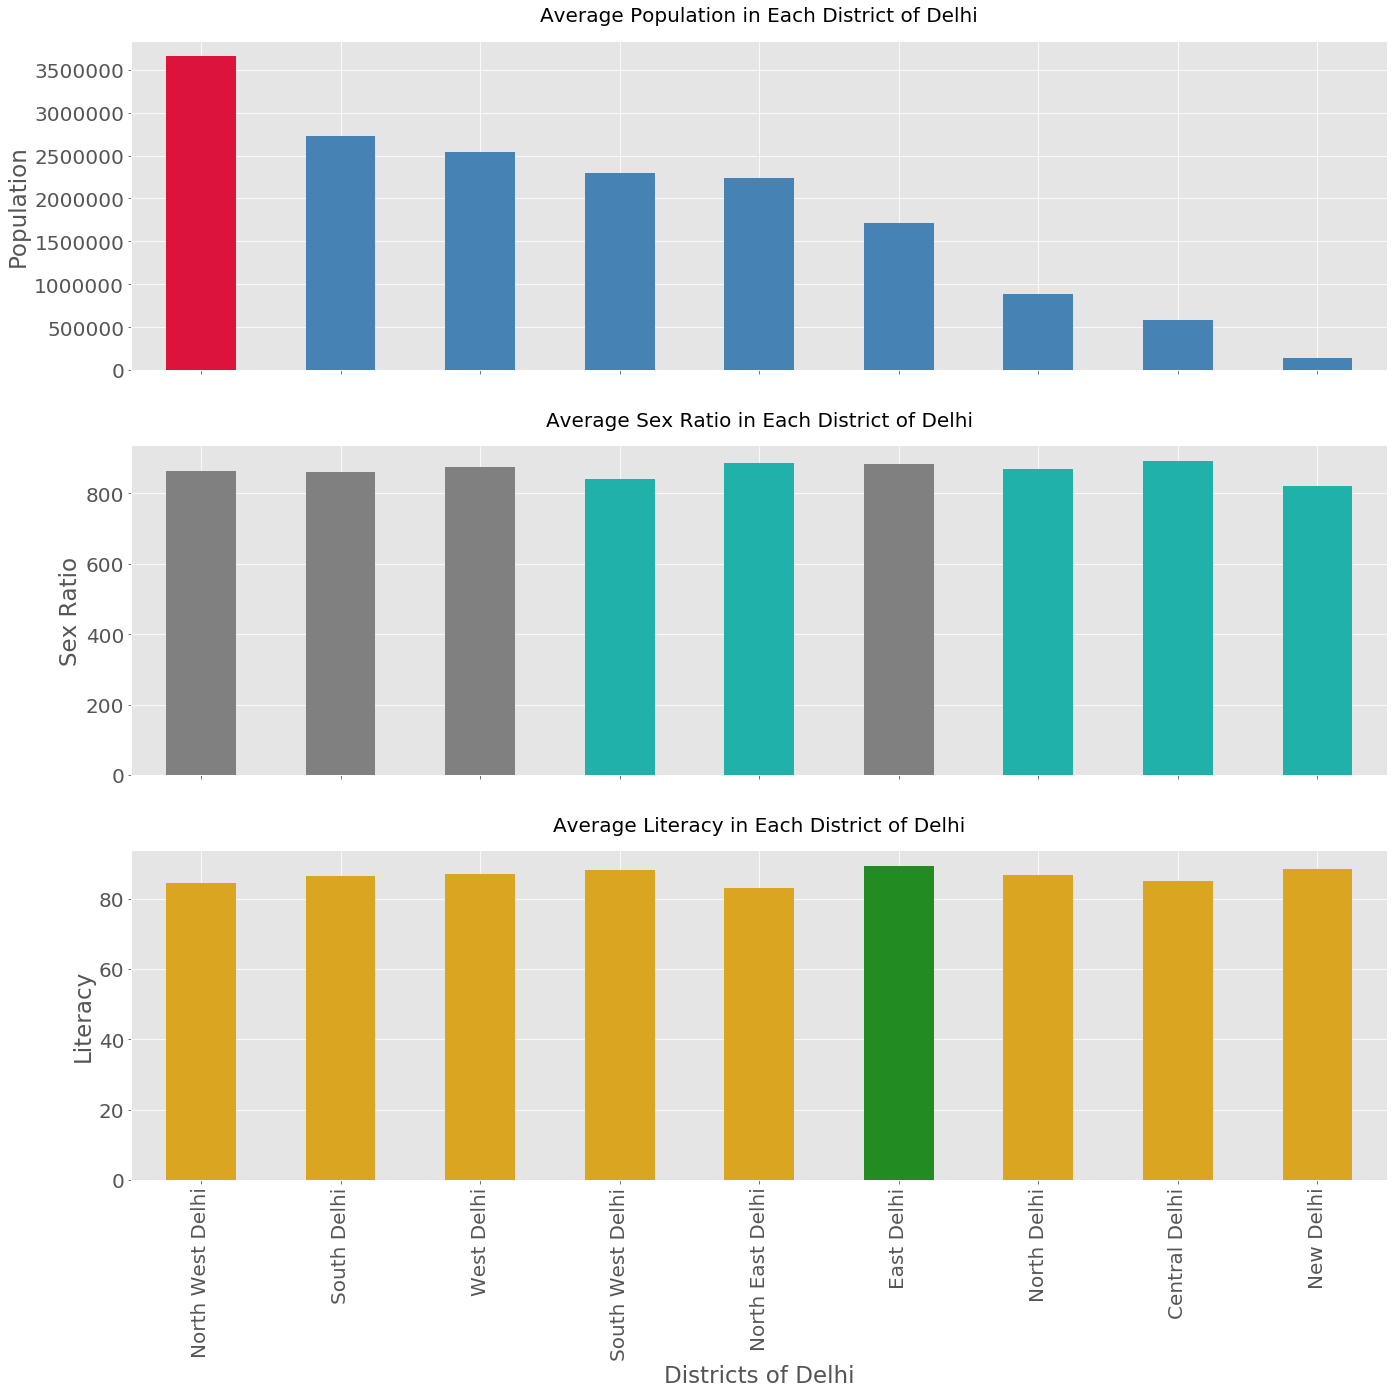

In [76]:
ratio = demographs['Sex Ratio'].astype(int)
pop = demographs['Population'].astype(int)
literacy = demographs['Literacy'].astype(float)
district=demographs['District']

plt.style.use('ggplot')
fig = plt.figure(figsize = (20, 20))
ax_0 = fig.add_subplot(3, 1, 1) # add subplot 1 
ax_1 = fig.add_subplot(3, 1, 2) # add subplot 2
ax_2 = fig.add_subplot(3, 1, 3) # add subplot 2

#Subplot 1: Population
pop.plot.bar(sharex = True, ax = ax_0, color=['crimson','steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'rebeccapurple'])
ax_0.set_ylabel('Population', fontsize = 23)
ax_0.set_xlabel('Districts of Delhi', fontsize = 23)
ax_0.tick_params(axis='both', which='major', labelsize=20)
ax_0.set_title("Average Population in Each District of Delhi", fontdict = {'fontsize' : 20}, y = 1.04)

#Subplot 2: Sex Ratio
ratio.plot.bar(sharex = True, ax = ax_1, color=['gray','gray', 'gray', 'lightseagreen', 'lightseagreen', 'gray', 'lightseagreen', 'lightseagreen', 'lightseagreen', 'rebeccapurple'])
ax_1.set_ylabel('Sex Ratio', fontsize = 23)
ax_1.set_xlabel('Districts of Delhi', fontsize = 23)
ax_1.tick_params(axis='both', which='major', labelsize=20)
ax_1.set_title("Average Sex Ratio in Each District of Delhi", fontdict = {'fontsize' : 20}, y = 1.04)

#Subplot 3: Literacy
literacy.plot.bar(sharex = True, ax = ax_2, color=['goldenrod', 'goldenrod', 'goldenrod', 'goldenrod', 'goldenrod','forestgreen', 'goldenrod', 'goldenrod', 'goldenrod', 'rebeccapurple'])
ax_2.set_ylabel('Literacy', fontsize = 23)
ax_2.set_xlabel('Districts of Delhi', fontsize = 23)
ax_2.tick_params(axis='both', which='major', labelsize=20)
ax_2.set_title("Average Literacy in Each District of Delhi", fontdict = {'fontsize' : 20}, y = 1.04)

fig.tight_layout(pad = 3.0)
plt.savefig('Visualizations by Districts of Delhi.png')
plt.show()

<b><u>Observations:</u></b>
<li> North West Delhi has highest population followed by South Delhi and then, West Delhi.
<li> Central Delhi, East Delhi and North East Delhi have highest Sex Ratio
<li> New Delhi has highest Literacy Rate followed by East Delhi
<br><br>
<b><u>Inference:</u></b><br>
<br><p>From The Above Plots, We can infer Tehsils in West Delhi can be considered to be good locations for retail store as they have good population size, good sex ratio and descent literacy rate. But for those stores that are aiming for niche market, Tehsils in East Delhi can be better locations to target as it has low population size, high literacy rate and moderate sex ratio.</p>



### 3.4 Exploring Venues in the Tehsils<a name="exploringvenues"></a>

In [78]:
population_df.head()

,Borough,Neighborhood,Postal Code,Population,Latitude,Longitude
0,North West,Narela,2071,809913,28.8398,77.077
1,North,Civil Lines,2074,688616,28.6767,77.2177
2,North East,Seelam Pur,2077,1378779,28.6701,77.2712
3,East,Gandhi Nagar,2080,395342,28.6609,77.2643
4,New Delhi,Parliament Street,2083,52394,28.6255,77.2142


First, lets explore top 100 venues in Connaught Place. Below we will define credentials of FourSquare API to fetch venues in any Tehsil.

In [79]:
CLIENT_ID = 'TYJSQXZ31UNE5OTYB3G54KRDS3OFIKIBZPT2PYKKTVPEZKAJ' 
CLIENT_SECRET = '0VTLHYXAPVNWNLNTC0SEGXG5FMIW0A3FNR3GAUJ0GAW4GHCH'
VERSION = '20200406'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TYJSQXZ31UNE5OTYB3G54KRDS3OFIKIBZPT2PYKKTVPEZKAJ
CLIENT_SECRET:0VTLHYXAPVNWNLNTC0SEGXG5FMIW0A3FNR3GAUJ0GAW4GHCH


In [83]:
ind=5
neighborhood_latitude = population_df.loc[ind, 'Latitude'] # Tehsil latitude value
neighborhood_longitude = population_df.loc[ind, 'Longitude'] # Tehsil longitude value

neighborhood_name = population_df.loc[ind, 'Neighborhood']# Tehsil name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Karol Bagh are 28.650450000000035, 77.18873000000008.


Then, We will create GET request URL:

In [84]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    1020, 
    100)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TYJSQXZ31UNE5OTYB3G54KRDS3OFIKIBZPT2PYKKTVPEZKAJ&client_secret=0VTLHYXAPVNWNLNTC0SEGXG5FMIW0A3FNR3GAUJ0GAW4GHCH&v=20200406&ll=28.650450000000035,77.18873000000008&radius=1020&limit=100'

After this, we will fetch URL from FourSquare API in JSON format and convert it into dataframe.

In [85]:
results = requests.get(url).json()

# Defining function to extract categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roshan Di Kulfi | रोशन दी क़ुल्फ़ी,Snack Place,28.650428,77.192391
1,Raviraj Ki Kulfi,Dessert Shop,28.649359,77.190215
2,Suruchi Restaurant,Indian Restaurant,28.647168,77.188693
3,McDonald's,Fast Food Restaurant,28.648102,77.190539
4,Ganesh restaurant,BBQ Joint,28.648379,77.192826


Now, we will get venues in all Tehsils of Delhi.

In [88]:
# The following function fetches venues from foursquare api:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            1020, 
            100)
            
        # make the GET request
        import time

        page = ''
        while page == '':
            try:
                page = requests.get(url)
                break
            except:
                print("Connection refused by the server..")
                print("Let me sleep for 5 seconds")
                print("ZZzzzz...")
                time.sleep(5)
                print("Was a nice sleep, now let me continue...")
                continue
        results=page.json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [96]:
tehsil_venues = getNearbyVenues(names=population_df['Neighborhood'],
                                   latitudes=population_df['Latitude'],
                                   longitudes=population_df['Longitude']
                                  )

Narela
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Civil Lines
Seelam Pur
Gandhi Nagar
Parliament Street
Karol Bagh
Punjabi Bagh
Najafgarh
Defence Colony
Hauz Khas
Delhi Cantonment
Patel Nagar
Pahar Ganj
Connaught Place
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Vivek Vihar
Shahdara
Sadar Bazar
Saraswati Vihar
Model Town
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sleep, now let me continue...
Connection refused by the server..
Let me sleep for 5 seconds
ZZzzzz...
Was a nice sle

In [99]:
print(tehsil_venues.shape)
tehsil_venues.head(40)

(641, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Narela,28.83979,77.07696,Axis Bank ATM,28.839769,77.076927,ATM
1,Narela,28.83979,77.07696,Axis Bank ATM,28.839769,77.076927,ATM
2,Narela,28.83979,77.07696,Satyam Multiplex,28.846124,77.083340,Multiplex
3,Narela,28.83979,77.07696,vicky traders,28.846180,77.083427,Furniture / Home Store
4,Civil Lines,28.67671,77.21767,moets,28.678015,77.224739,Chinese Restaurant
5,Civil Lines,28.67671,77.21767,Dunkin',28.680002,77.208363,Donut Shop
6,Civil Lines,28.67671,77.21767,24SEVEN,28.678732,77.208037,Grocery Store
7,Civil Lines,28.67671,77.21767,Maidens Hotel,28.674377,77.226452,Hotel
8,Civil Lines,28.67671,77.21767,Domino's Pizza,28.679000,77.208000,Pizza Place
9,Civil Lines,28.67671,77.21767,The Embassy,28.676556,77.224969,Indian Restaurant


In [100]:
tehsil_venues.drop(index=0,inplace=True)
tehsil_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Narela,28.83979,77.07696,Axis Bank ATM,28.839769,77.076927,ATM
2,Narela,28.83979,77.07696,Satyam Multiplex,28.846124,77.083340,Multiplex
3,Narela,28.83979,77.07696,vicky traders,28.846180,77.083427,Furniture / Home Store
4,Civil Lines,28.67671,77.21767,moets,28.678015,77.224739,Chinese Restaurant
5,Civil Lines,28.67671,77.21767,Dunkin',28.680002,77.208363,Donut Shop
6,Civil Lines,28.67671,77.21767,24SEVEN,28.678732,77.208037,Grocery Store
7,Civil Lines,28.67671,77.21767,Maidens Hotel,28.674377,77.226452,Hotel
8,Civil Lines,28.67671,77.21767,Domino's Pizza,28.679000,77.208000,Pizza Place
9,Civil Lines,28.67671,77.21767,The Embassy,28.676556,77.224969,Indian Restaurant
10,Civil Lines,28.67671,77.21767,SUBWAY,28.679507,77.208324,Sandwich Place


In [103]:
tehsil_venues.reset_index(drop=True,inplace=True)

In [104]:
print('FInal shape of data after removing duplicate row : {}'.format(tehsil_venues.shape))

FInal shape of data after removing duplicate row : (640, 7)


In [105]:
df = pd.DataFrame(tehsil_venues.groupby('Neighborhood').count())
df

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Chanakya Puri,14,14,14,14,14,14
Civil Lines,14,14,14,14,14,14
Connaught Place,93,93,93,93,93,93
Darya Ganj,12,12,12,12,12,12
Defence Colony,50,50,50,50,50,50
Delhi Cantonment,4,4,4,4,4,4
Gandhi Nagar,5,5,5,5,5,5
Hauz Khas,92,92,92,92,92,92
Kalkaji,12,12,12,12,12,12


Let's find out how many unique categories can be curated from all the returned venues:

In [106]:
print('There are {} uniques categories.'.format(len(tehsil_venues['Venue Category'].unique())))

There are 122 uniques categories.


# Analysis <a name="analysis"></a>

## 4.1 Analyzing Each Neighborhood

<p>First, we will get frequencies of occurrence of each venue category.</p>

In [107]:
# one hot encoding
tehsil_onehot = pd.get_dummies(tehsil_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tehsil_onehot['Neighborhood'] = tehsil_venues['Neighborhood'] 
tehsil_onehot.head()

,ATM,Airport Terminal,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,...,Tea Room,Theater,Tibetan Restaurant,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Wine Bar,Yoga Studio
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
tehsil_onehot.shape

(640, 122)

<p>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:</p>

In [109]:
tehsil_grouped = tehsil_onehot.groupby('Neighborhood').mean().reset_index()
tehsil_grouped

,Neighborhood,ATM,Airport Terminal,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,...,Tea Room,Theater,Tibetan Restaurant,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Wine Bar,Yoga Studio
0,Chanakya Puri,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,Civil Lines,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.071429,0.000000,0.00000,0.000000,0.000000,0.000000
2,Connaught Place,0.000000,0.000000,0.000000,0.000000,0.000000,0.021505,0.000,0.021505,0.00000,...,0.010753,0.00000,0.010753,0.000,0.000000,0.010753,0.00000,0.000000,0.000000,0.000000
3,Darya Ganj,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.083333,0.00000,0.083333,0.000000,0.000000
4,Defence Colony,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,Delhi Cantonment,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,Gandhi Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000
7,Hauz Khas,0.000000,0.000000,0.021739,0.010870,0.021739,0.032609,0.000,0.000000,0.01087,...,0.010870,0.01087,0.010870,0.000,0.000000,0.000000,0.01087,0.000000,0.000000,0.000000
8,Kalkaji,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.083333,0.00000,0.000000,0.000000,0.000000
9,Karol Bagh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.027027,0.00000,...,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [170]:
tehsil_grouped.shape

(27, 122)

<p>Let's print each neighborhood along with the top 5 most common venues:</p>

In [171]:
num_top_venues = 10

for hood in tehsil_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tehsil_grouped[tehsil_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chanakya Puri----
                  venue  freq
0     Indian Restaurant  0.29
1                   Pub  0.07
2            Restaurant  0.07
3                  Café  0.07
4   Moroccan Restaurant  0.07
5             Nightclub  0.07
6                 Hotel  0.07
7                  Park  0.07
8      Asian Restaurant  0.07
9  Karnataka Restaurant  0.07


----Civil Lines----
                venue  freq
0  Light Rail Station  0.14
1       Grocery Store  0.07
2               Hotel  0.07
3          Donut Shop  0.07
4      Sandwich Place  0.07
5   Convenience Store  0.07
6         Coffee Shop  0.07
7          Smoke Shop  0.07
8         Snack Place  0.07
9  Chinese Restaurant  0.07


----Connaught Place----
                venue  freq
0   Indian Restaurant  0.13
1                Café  0.11
2               Hotel  0.10
3                 Bar  0.05
4  Chinese Restaurant  0.05
5         Coffee Shop  0.03
6              Lounge  0.03
7  Italian Restaurant  0.02
8       Deli / Bodega  0.02
9           

9      Nightlife Spot   0.0


----Shahdara----
                venue  freq
0                 ATM   0.2
1      Chocolate Shop   0.2
2                Park   0.2
3      Clothing Store   0.2
4     Motorcycle Shop   0.2
5  Light Rail Station   0.0
6              Lounge   0.0
7            Platform   0.0
8         Pizza Place   0.0
9            Pharmacy   0.0


----Vasant Vihar----
                  venue  freq
0                  Café  0.11
1           Pizza Place  0.08
2    Chinese Restaurant  0.08
3  Fast Food Restaurant  0.05
4            Restaurant  0.05
5           Coffee Shop  0.05
6                 Hotel  0.03
7        Nightlife Spot  0.03
8                   Gym  0.03
9                  Park  0.03


----Vivek Vihar----
                     venue  freq
0                     Pool  0.12
1              Pizza Place  0.12
2        Indian Restaurant  0.12
3                    Diner  0.12
4       Athletics & Sports  0.12
5       Light Rail Station  0.12
6                    Track  0.12
7     

<p>Now, We will convert it into dataframe.</p>

In [172]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [173]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tehsil_venues_sorted = pd.DataFrame(columns=columns)
tehsil_venues_sorted['Neighborhood'] = tehsil_grouped['Neighborhood']

for ind in np.arange(tehsil_grouped.shape[0]):
    tehsil_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tehsil_grouped.iloc[ind, :], num_top_venues)

In [174]:
df = tehsil_venues_sorted.head(10)
df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakya Puri,Indian Restaurant,Hotel,Café,Park,Moroccan Restaurant,Restaurant,Karnataka Restaurant,Pub,Asian Restaurant,Nightclub
1,Civil Lines,Light Rail Station,Pizza Place,Snack Place,Indian Restaurant,Grocery Store,Donut Shop,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
2,Connaught Place,Indian Restaurant,Café,Hotel,Bar,Chinese Restaurant,Coffee Shop,Lounge,Pub,Deli / Bodega,BBQ Joint
3,Darya Ganj,Café,Art Gallery,Clothing Store,Light Rail Station,Stadium,Historic Site,Fast Food Restaurant,Plaza,Train Station,Hotel
4,Defence Colony,Indian Restaurant,Italian Restaurant,Café,Market,Fast Food Restaurant,Pizza Place,Bakery,Hotel,Sandwich Place,Dessert Shop
5,Delhi Cantonment,Convenience Store,Coffee Shop,Historic Site,Shopping Mall,Yoga Studio,Garden,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market
6,Gandhi Nagar,Dessert Shop,Burger Joint,Indian Restaurant,Train Station,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop
7,Hauz Khas,Indian Restaurant,Coffee Shop,Café,Bar,Dessert Shop,Chinese Restaurant,Market,Bakery,Asian Restaurant,Restaurant
8,Kalkaji,Hotel,Market,Fast Food Restaurant,Pizza Place,Train Station,Convenience Store,Restaurant,Indian Restaurant,Sandwich Place,Dumpling Restaurant
9,Karol Bagh,Indian Restaurant,Hotel,Fast Food Restaurant,Coffee Shop,Snack Place,Bakery,Food & Drink Shop,Pizza Place,BBQ Joint,Café


## 4.2 Clustering Tehsils

<p>Now, we will group tehsils into cluster and identify potential ones among them to target for. For this, we will run k-means algorithm to form clusters among tehsil (here, we are forming 5 clusters).</p>

In [175]:
# set number of clusters
kclusters = 8

tehsil_grouped_clustering = tehsil_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tehsil_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 3, 2, 1, 1, 1])

In [176]:
# add clustering labels
tehsil_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tehsil_merged = population_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tehsil_merged = tehsil_merged.join(tehsil_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tehsil_merged.head() # check the last columns!

,Borough,Neighborhood,Postal Code,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West,Narela,2071,809913,28.8398,77.077,0,ATM,Multiplex,Furniture / Home Store,Donut Shop,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop
1,North,Civil Lines,2074,688616,28.6767,77.2177,1,Light Rail Station,Pizza Place,Snack Place,Indian Restaurant,Grocery Store,Donut Shop,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
2,North East,Seelam Pur,2077,1378779,28.6701,77.2712,1,ATM,Shopping Mall,Light Rail Station,Fast Food Restaurant,Platform,Train Station,Arcade,Event Space,Falafel Restaurant,American Restaurant
3,East,Gandhi Nagar,2080,395342,28.6609,77.2643,2,Dessert Shop,Burger Joint,Indian Restaurant,Train Station,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop
4,New Delhi,Parliament Street,2083,52394,28.6255,77.2142,1,Hotel,Indian Restaurant,Chinese Restaurant,Bar,Café,Coffee Shop,Spa,Italian Restaurant,Lounge,Historic Site


In [177]:
tehsil_merged.dropna(inplace=True)

<p>Finally, Lets visualize the clusters:</p>

In [178]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tehsil_merged['Latitude'], tehsil_merged['Longitude'], tehsil_merged['Neighborhood'], tehsil_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4.3 Examining Clusters

### <B>Cluster 1: North West Delhi</B>

In [179]:
cluster1 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 0, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West,0,ATM,Multiplex,Furniture / Home Store,Donut Shop,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop


<p>In cluster 1, tehsils that have ATM, Multiplex, Shop and Service are clubbed together.</p>

### <B> Cluster 2: New Delhi, Central Delhi, North Delhi, East Delhi, South-West Delhi, West Delhi, South Delhi and North-West Delhi</B>

In [181]:
cluster2 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 1, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North,1,Light Rail Station,Pizza Place,Snack Place,Indian Restaurant,Grocery Store,Donut Shop,Convenience Store,Coffee Shop,Chinese Restaurant,Sandwich Place
2,North East,1,ATM,Shopping Mall,Light Rail Station,Fast Food Restaurant,Platform,Train Station,Arcade,Event Space,Falafel Restaurant,American Restaurant
4,New Delhi,1,Hotel,Indian Restaurant,Chinese Restaurant,Bar,Café,Coffee Shop,Spa,Italian Restaurant,Lounge,Historic Site
5,Central,1,Indian Restaurant,Hotel,Fast Food Restaurant,Coffee Shop,Snack Place,Bakery,Food & Drink Shop,Pizza Place,BBQ Joint,Café
6,West,1,Fast Food Restaurant,Donut Shop,Sandwich Place,Garden Center,Breakfast Spot,Coffee Shop,Convenience Store,Music Venue,Bakery,Gym / Fitness Center
8,South,1,Indian Restaurant,Italian Restaurant,Café,Market,Fast Food Restaurant,Pizza Place,Bakery,Hotel,Sandwich Place,Dessert Shop
9,South,1,Indian Restaurant,Coffee Shop,Café,Bar,Dessert Shop,Chinese Restaurant,Market,Bakery,Asian Restaurant,Restaurant
11,West,1,Pizza Place,Gym / Fitness Center,Park,Coffee Shop,Movie Theater,Café,Light Rail Station,Donut Shop,Indian Restaurant,Hotel
12,Central,1,Hotel,Indian Restaurant,Fast Food Restaurant,Gift Shop,Pizza Place,Restaurant,Café,Hostel,Motel,Food
13,New Delhi,1,Indian Restaurant,Café,Hotel,Bar,Chinese Restaurant,Coffee Shop,Lounge,Pub,Deli / Bodega,BBQ Joint


<p>In cluster 2, Tehsils with Indian/Fast Food/Italian Restaurant, cafe/coffee shop, hotel and pubs are clubbed together. This is the biggest cluster found through k-means algorithm.</p> 

### <b>Cluster 3:East Delhi

In [182]:
cluster3 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 2, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East,2,Dessert Shop,Burger Joint,Indian Restaurant,Train Station,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop


<p>In Cluster 3, tehsils with Dessert Shop, Event Space, Falafel Restaurant and Flea Market	 are clubbed together.</p>

### <b>Cluster 4: South-West Delhi</b>

In [183]:
cluster4 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 3, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster4

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,South West,3,Convenience Store,Coffee Shop,Historic Site,Shopping Mall,Yoga Studio,Garden,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market


<p>This Cluster has almost same venue categories as in cluster 1,3. So, Cluster 1,3 and Cluster 4 can be clubbed together.</p>

### <b>Cluster 5: North Delhi, West Delhi and South Delhi</b>

In [184]:
cluster5 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 4, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster5

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,South West,4,Resort,Yoga Studio,Garden Center,Dumpling Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop


<p>In Cluster 5, Tehsils with Resort and Yoga Studio are clubbed together.</p>

### <b>Cluster 6:</b>

In [185]:
cluster6 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 5, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster6

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,North,5,Restaurant,Pizza Place,Snack Place,Metro Station,Fast Food Restaurant,Food & Drink Shop,Frozen Yogurt Shop,French Restaurant,Food Truck,Yoga Studio


<p>In Cluster 6, Tehsils with Restaurant andPizza Place	 are clubbed together.</p>

### <b>Cluster 7:</b>

In [192]:
cluster7 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 6, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster7

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,East,6,Shop & Service,Light Rail Station,Indian Restaurant,Pizza Place,Diner,Track,Pool,Athletics & Sports,French Restaurant,Food Truck
20,North East,6,Indian Restaurant,Light Rail Station,Bank,Pizza Place,Diner,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Garden Center


<p>In Cluster 7, Shop, Service and Light Rail Station are clubbed together.</p>

### <b>Cluster 8:</b>

In [187]:
cluster8 = tehsil_merged.loc[tehsil_merged['Cluster Labels'] == 7, tehsil_merged.columns[[0] + list(range(6, tehsil_merged.shape[1]))]]
cluster8

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,North East,7,ATM,Park,Clothing Store,Chocolate Shop,Motorcycle Shop,Garden,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food


<p>In Cluster 8 all kinds of Shops,Park and Garden are clubbed together.</p>

<p>The Clusters 1,3 and 4 are almost similar. So, They can be clubbed together. Hence, There are 6 clusters in total found after clubbing similar clusters.</p>

## 4..4 Finding and Visualizing Prospective Tehsils Based on a Criteria
<p>As already stated, prefered locations to set up retail stores in Tehsils which has Indian Restaurant, Cafe and Pubs as the most common value as lots of people come at these places for having fun and would also like to do shopping if any retail stores will be present nearby. Violin plot from the seaborn library can be used to analyse venue data - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.</p>

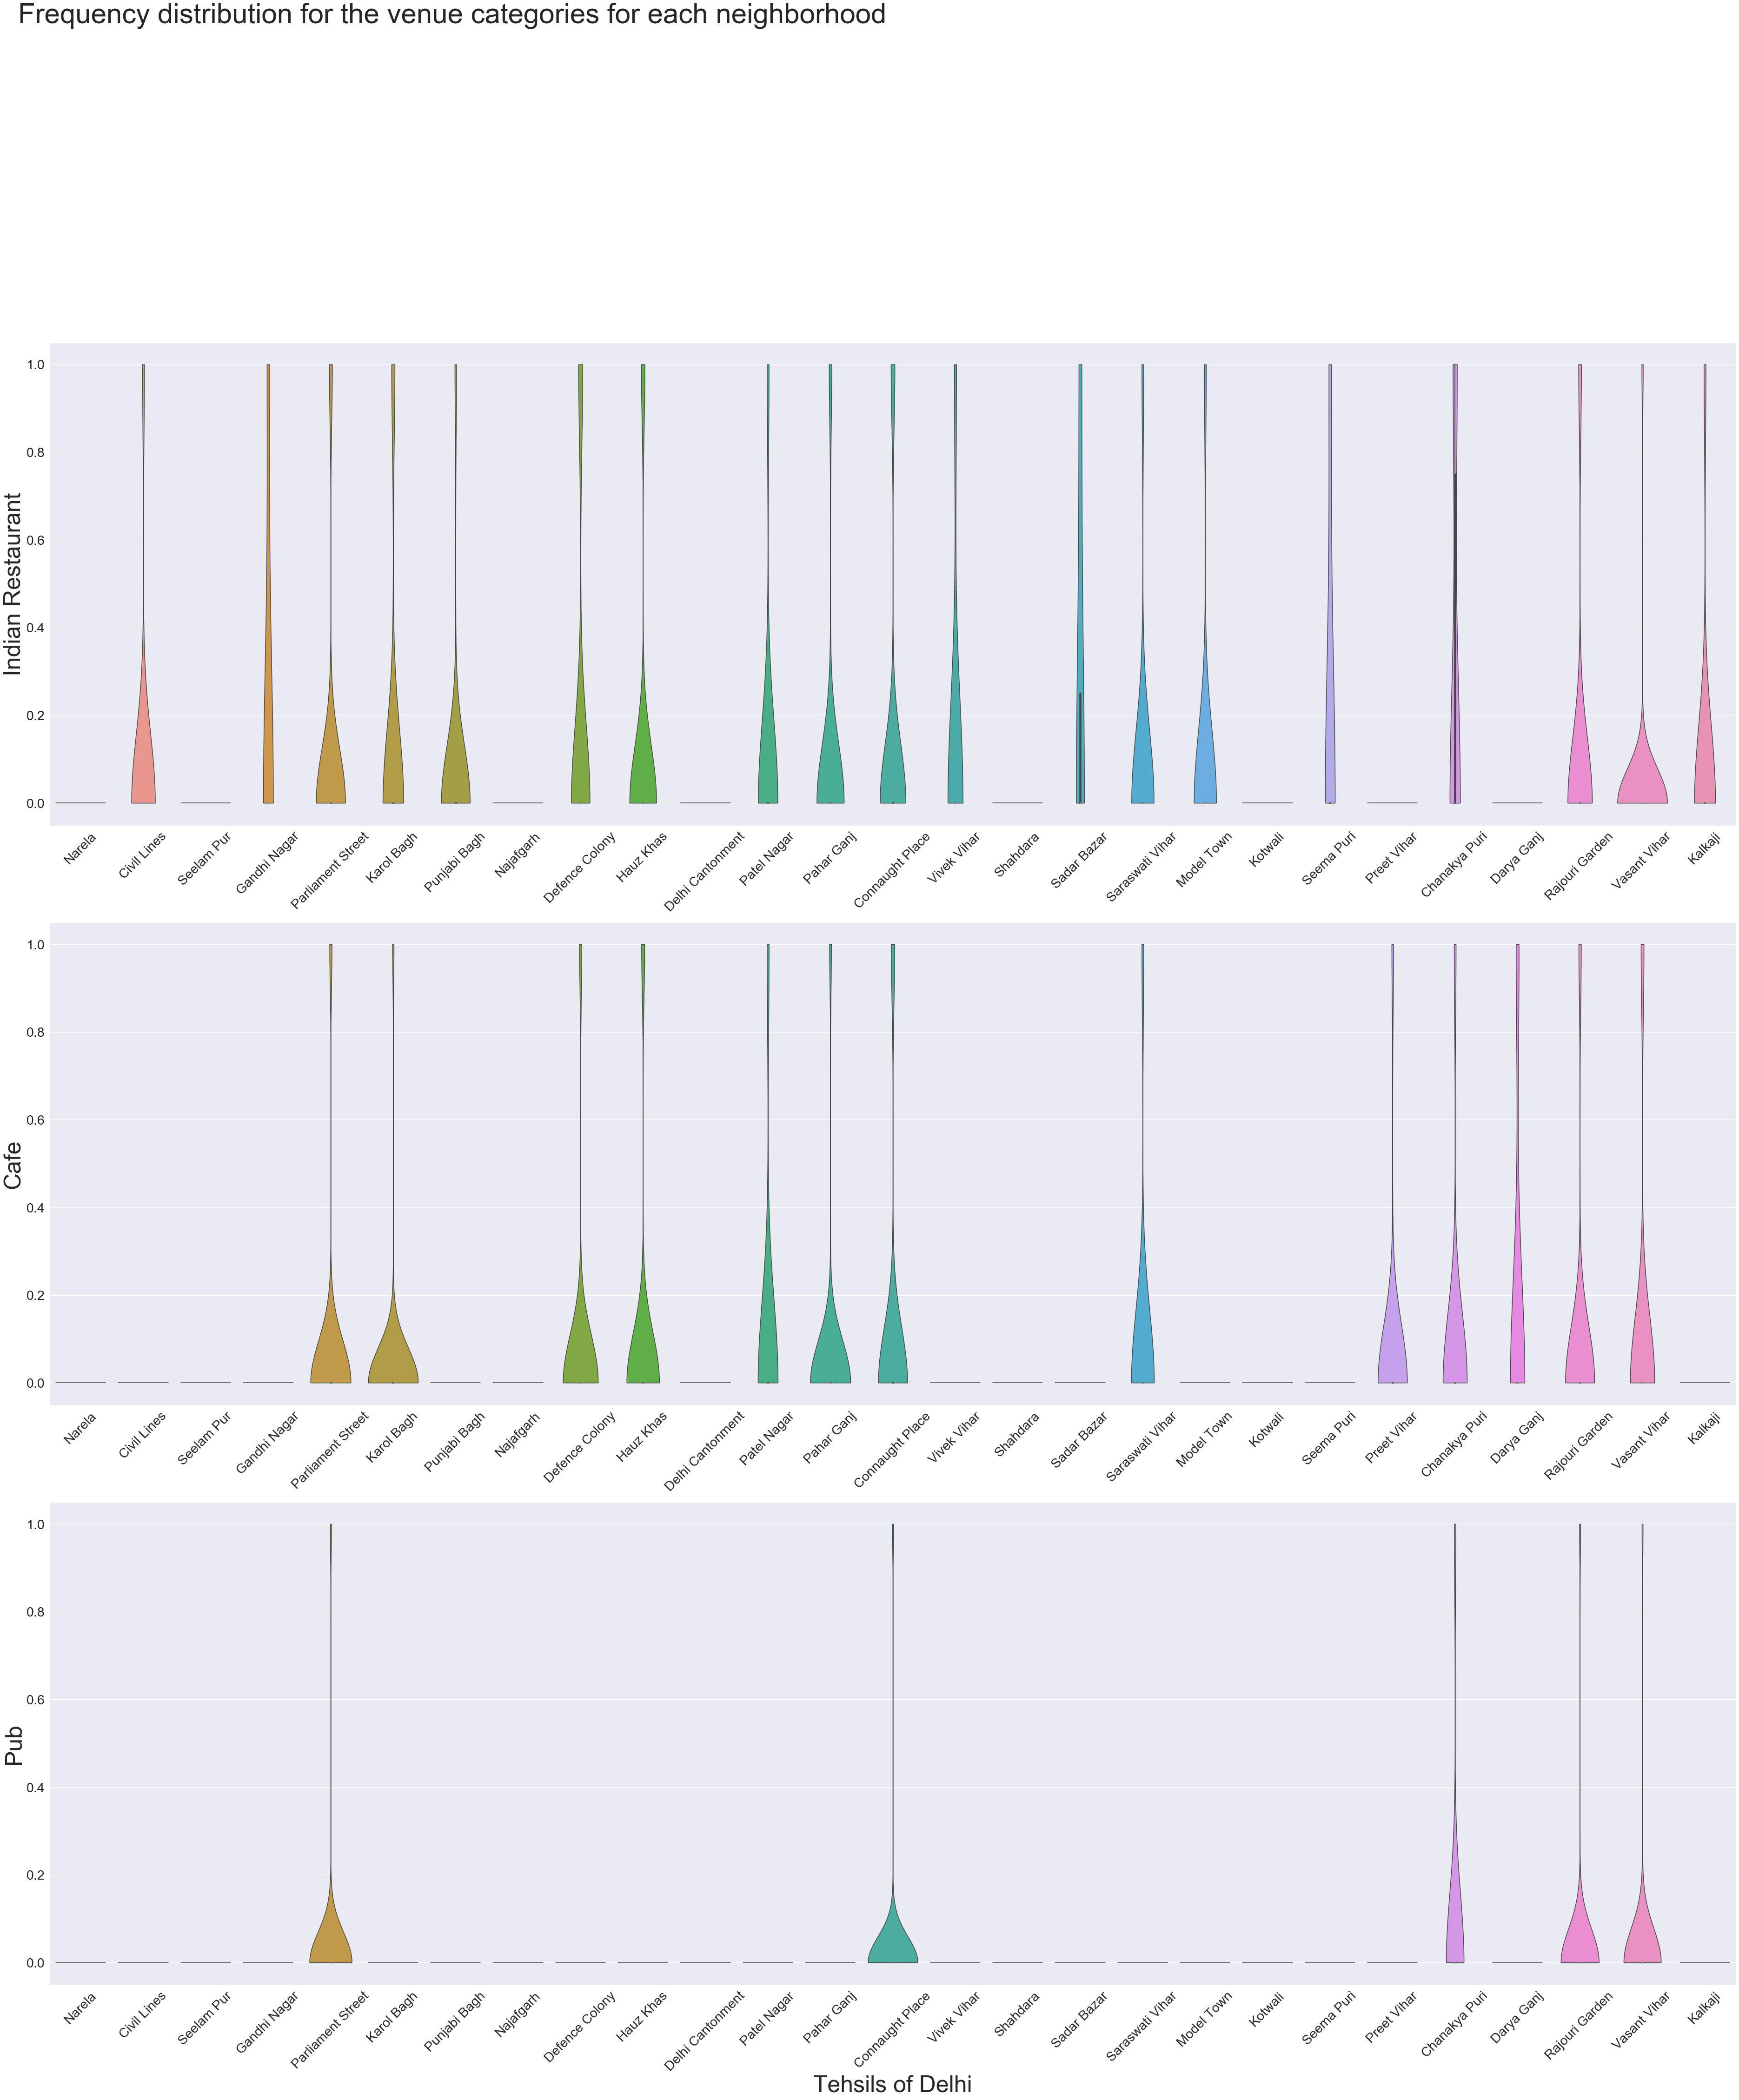

In [189]:
import seaborn as sns

fig = plt.figure(figsize=(65,65))
sns.set(font_scale=2.6)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=tehsil_onehot, cut=0);
plt.xlabel("")
plt.ylabel("Indian Restaurant", fontsize=50)
plt.xticks(rotation=45)

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=tehsil_onehot, cut=0);
plt.xlabel("")
plt.ylabel("Cafe", fontsize=50)
plt.xticks(rotation=45)

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Pub", data=tehsil_onehot, cut=0);
plt.ylabel("Pub", fontsize=50)
plt.xticks(rotation=45)
plt.xlabel("Tehsils of Delhi", fontsize=50)
ax.text(-1.0, 3.1, 'Frequency distribution for the venue categories for each neighborhood', fontsize=60)
#fig.tight_layout()
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=300)
plt.show()

<p>Based on above violin plots, <b>Chanakya Puri</b>, <b>Connaught Place</b>, <b>Parliament Street</b>, <b>Vasant Vihar</b> and <b>Rajouri Garden</b>. Now, let's see in which cluster these locations lie.</p> 

In [190]:
tehsil_select = tehsil_merged.loc[tehsil_merged.Neighborhood.isin(['Chanakya Puri', 'Connaught Place', 'Parliament Street', 'Vasant Vihar', 'Rajouri Garden'])]
tehsil_select

,Borough,Neighborhood,Postal Code,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,New Delhi,Parliament Street,2083,52394,28.6255,77.2142,1,Hotel,Indian Restaurant,Chinese Restaurant,Bar,Café,Coffee Shop,Spa,Italian Restaurant,Lounge,Historic Site
13,New Delhi,Connaught Place,2084,28228,28.6339,77.2197,1,Indian Restaurant,Café,Hotel,Bar,Chinese Restaurant,Coffee Shop,Lounge,Pub,Deli / Bodega,BBQ Joint
22,New Delhi,Chanakya Puri,2085,61382,28.5951,77.1857,1,Indian Restaurant,Hotel,Café,Park,Moroccan Restaurant,Restaurant,Karnataka Restaurant,Pub,Asian Restaurant,Nightclub
24,West,Rajouri Garden,2091,481632,28.6456,77.1221,1,Fast Food Restaurant,Indian Restaurant,Café,Cosmetics Shop,Bakery,Garden,Pizza Place,Market,Salon / Barbershop,Chinese Restaurant
25,South West,Vasant Vihar,2094,641666,28.5649,77.1613,1,Café,Pizza Place,Chinese Restaurant,Coffee Shop,Restaurant,Fast Food Restaurant,Movie Theater,Middle Eastern Restaurant,Cocktail Bar,Pub


In [191]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tehsil_select['Latitude'], tehsil_select['Longitude'], tehsil_select['Neighborhood'], tehsil_select['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<p></p>

# Results and Discussion <a name="results"></a>

Based on above analysis we can say that West Dehli shows good potential for retail market as West Delhi has good population size, good literacy rate and descent gender ratio, we can narrow down our choice for prospective locations for a fashion retail store to Rajouri Garden as it is in West Delhi District.
<p>We can say that based on certain parameters or criteria, we can select one or two clusters of Tehsils of Delhi through the above methodology for the establishment of a retail store.</p>
<p>There may be other ways this analysis could have been performed based on different methodolgy, different algorithm and perhaps different data sources. But I chose this method as the dataset related to tehsils in Delhi is readily available through Census India, and also, K-Means algorithm is easily able to be applied on this dataset.</p>

# Conclusion <a name="conclusion"></a>

In the analysis performed based on population data, we can improve the analysis by performing various measures. Above analysis have some limitation which we can overcome by performing following measures
1. Area of each Tehsil can also be used for analysis.
2. Data related to centennials and millennials can be employed for decision-making and, thus can be used for further analysis.
3. Brands famous or trending in a particular tehsil can also be helpful to decide better locations for establishment of  retail stores.